In [1]:
import tensorflow as tf
import csv
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,Dropout,Input,Conv2D,MaxPool2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import Xception
from tensorflow.keras.regularizers import l2 

2023-10-17 15:59:50.811547: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# num = 374 outcome = gender
O_csv_file = 'labels4noCLAHE.csv' 

# num = 374 outcome = Hyperlipidemia
csv_file = '/home/john/network/Fundus/model/csv/labels4_(374).csv'

# num = 352 outcome = gender
OAO_csv_file = '/home/john/network/Fundus/model/csv/labels4_(352).csv'

In [3]:
data = pd.read_csv(csv_file)
data

,ID,hyperlipidemia,Age,Gender,HTN,BMI,SP,DP,HbA1c
0,ROI_9531160-02-R-20160302.jpg,1,61,1,1,29.76,138.0,71.0,7.1
1,ROI_4144311-05-L-20221227.jpg,1,70,2,0,31.50,142.0,83.0,6.6
2,ROI_4114625-08-L20230222.jpg,1,36,1,1,36.82,146.0,84.0,7.8
3,ROI_4288688-01-L-20190513.jpg,1,56,1,1,26.12,151.0,88.0,6.8
4,ROI_4274556-01-L-20220411.jpg,1,52,1,1,36.84,118.0,70.0,6.0
...,...,...,...,...,...,...,...,...,...
369,ROI_4114625-02-L-20160630.jpg,1,36,1,1,36.82,146.0,84.0,7.8
370,ROI_4304064-08-R-20180620.jpg,1,61,2,1,19.88,112.0,64.0,6.4
371,ROI_1049032-04-R-20151009.jpg,1,74,2,1,23.18,137.0,58.0,6.2
372,ROI_4376188-03-R-20220929.jpg,1,47,1,0,23.81,135.0,69.0,6.5


In [4]:
# image_folder = '/home/john/network/Fundus/model/Color/dataset/'
image_folder = '/home/john/network/Fundus/model/Color/dataset(select)/'
# image_folder = '/home/john/network/Fundus/model/Color/dataset(CLAHE)/'

images = []

# y = data['Gender'].values

for index, row in data.iterrows():
    image_id = row['ID'] 

    image_path = os.path.join(image_folder, image_id)
    
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image_rgb, (785, 785))        # %50 small

    # images.append(image_rgb)
    images.append(image)

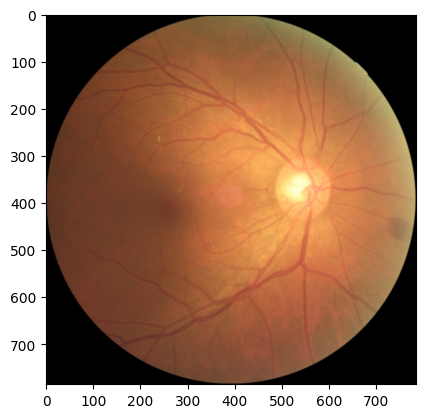

In [5]:
plt.imshow(images[0])

In [6]:
# X_train, X_test, y_train, y_test= train_test_split(images, data.Gender, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test= train_test_split(images, data.hyperlipidemia, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test= train_test_split(images, data.HTN, test_size=0.2, random_state=42)

In [7]:
QoQ = LabelEncoder()
y_train = to_categorical(QoQ.fit_transform(y_train))
y_test = to_categorical(QoQ.fit_transform(y_test))

In [8]:
batch_size = 16
num_epochs = 200

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(785, 785, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))  
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))  
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))  
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01))) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))  # 
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(0.01)))  
model.summary()

2023-10-17 16:00:26.036494: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-10-17 16:00:26.061055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-17 16:00:26.061480: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 Ti computeCapability: 8.6
coreClock: 1.665GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 849.46GiB/s
2023-10-17 16:00:26.061506: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-10-17 16:00:26.063961: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-17 16:00:26.064015: I tensorflow/stream_executor

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 785, 785, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 392, 392, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 392, 392, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 392, 392, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 196, 196, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 196, 196, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 196, 196, 128)     1

2023-10-17 16:00:26.067943: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 16:00:26.068518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-17 16:00:26.069030: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 Ti computeCapability: 8.6
coreClock: 1.665GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 849.46GiB/s
2023-10-17 16:00:26.069095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (

In [10]:
model.compile(optimizer= Adam(lr=0.00001),loss='binary_crossentropy', metrics=['accuracy','AUC'])
model_history = model.fit(np.array(X_train),np.array(y_train),epochs=num_epochs,batch_size=batch_size, validation_split=0.2)

/home/john/anaconda3/envs/gpu/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2023-10-17 16:00:28.965254: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-10-17 16:00:28.984761: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3187200000 Hz


Epoch 1/200


2023-10-17 16:00:29.615648: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-10-17 16:00:30.107230: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8401
2023-10-17 16:00:30.765354: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2023-10-17 16:00:30.765373: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-10-17 16:00:30.765408: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-17 16:00:30.880652: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-17 16:00:30.880888: I tensorflow/stream_exec

15/15 [==============================] - 11s 437ms/step - loss: 13.8380 - accuracy: 0.8536 - auc: 0.8630 - val_loss: 13.7599 - val_accuracy: 0.8000 - val_auc: 0.8310
Epoch 2/200
15/15 [==============================] - 3s 174ms/step - loss: 13.6301 - accuracy: 0.8745 - auc: 0.8705 - val_loss: 13.6668 - val_accuracy: 0.8000 - val_auc: 0.8331
Epoch 3/200
15/15 [==============================] - 3s 175ms/step - loss: 13.5517 - accuracy: 0.8745 - auc: 0.8645 - val_loss: 13.5969 - val_accuracy: 0.8000 - val_auc: 0.8358
Epoch 4/200
15/15 [==============================] - 3s 174ms/step - loss: 13.4458 - accuracy: 0.8745 - auc: 0.8766 - val_loss: 13.4850 - val_accuracy: 0.8000 - val_auc: 0.8357
Epoch 5/200
15/15 [==============================] - 3s 175ms/step - loss: 13.3413 - accuracy: 0.8745 - auc: 0.8866 - val_loss: 13.4096 - val_accuracy: 0.8000 - val_auc: 0.8372
Epoch 6/200
15/15 [==============================] - 3s 174ms/step - loss: 13.2891 - accuracy: 0.8745 - auc: 0.8583 - val_loss

In [ ]:
model.save("../model/save/CNN-batch_size{}-epoch-{}.h5".format(batch_size,num_epochs))

# label = HTN ,data numbers = 374

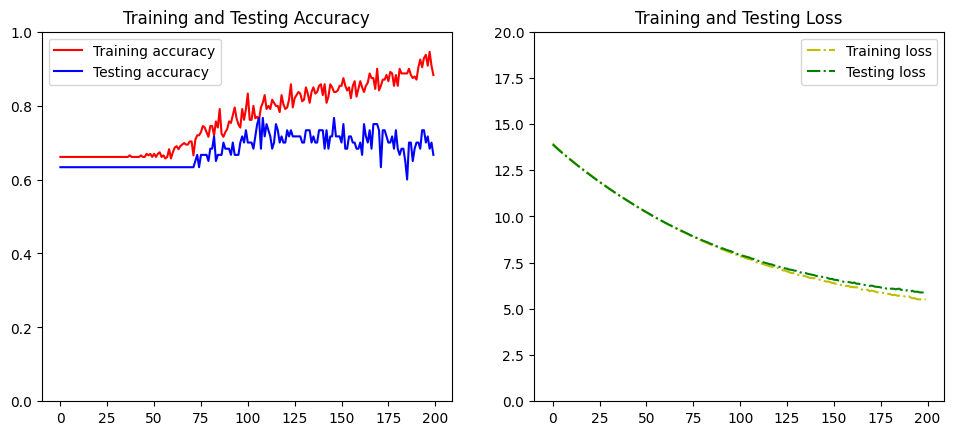

In [10]:
acc = model_history.history['accuracy']
val_auc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']


epochs = range(len(acc))
plt.figure(figsize=(18, 4.8))
plt.subplot(1,3,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_auc, 'b', label='Testing accuracy')
plt.ylim(0, 1)
plt.title('Training and Testing Accuracy')
plt.legend(loc=0)

plt.subplot(1,3,2)
plt.plot(epochs, loss, 'y-.', label='Training loss')
plt.plot(epochs, val_loss, 'g-.', label='Testing loss')
plt.title('Training and Testing Loss')
plt.ylim(0, 20)
plt.legend(loc=0)
plt.show()

In [11]:
X_train = np.array(X_train)
pred = model.predict(X_train)
X_test = np.array(X_test)
pred_y = model.predict(X_test)

<Figure size 640x480 with 0 Axes>

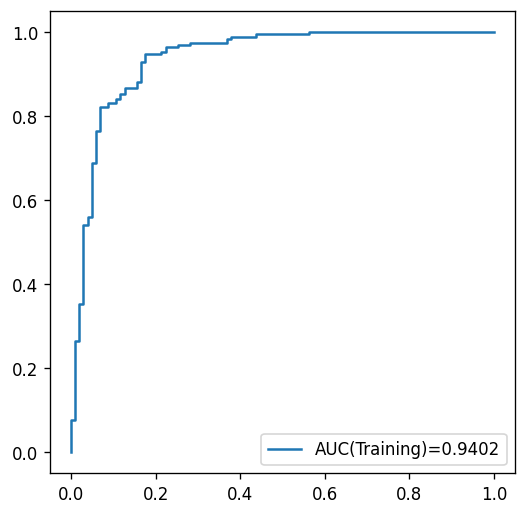

In [12]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(5, 5), dpi=120)

#fit logistic regression model and plot ROC curv
fpr, tpr, _ = metrics.roc_curve(y_train[:,1], pred[:, 1])
auc = round(metrics.roc_auc_score(y_train[:,1], pred[:, 1]), 4)
plt.plot(fpr,tpr,label="AUC(Training)="+str(auc))


plt.legend()

<Figure size 640x480 with 0 Axes>

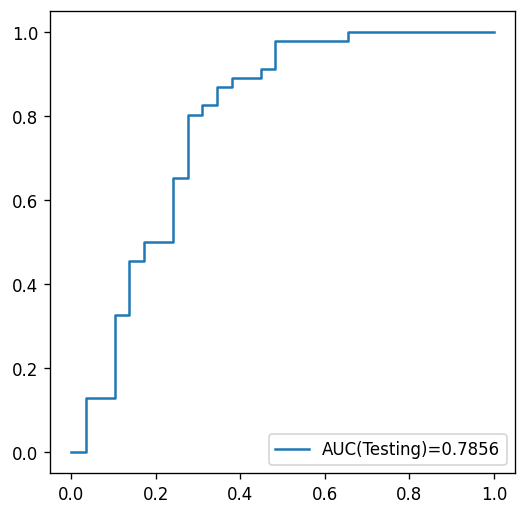

In [13]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(5, 5), dpi=120)

#fit logistic regression model and plot ROC curv
fpr, tpr, _ = metrics.roc_curve(y_test[:,1], pred_y[:, 1])
auc = round(metrics.roc_auc_score(y_test[:,1], pred_y[:, 1]), 4)
plt.plot(fpr,tpr,label="AUC(Testing)="+str(auc))

plt.legend()

# label = Hyperlipidemia ,data numbers = 374

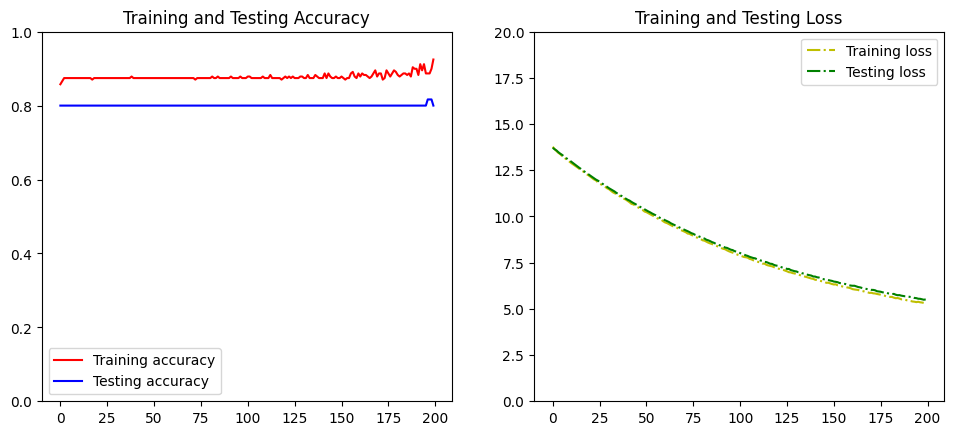

In [11]:
acc = model_history.history['accuracy']
val_auc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']


epochs = range(len(acc))
plt.figure(figsize=(18, 4.8))
plt.subplot(1,3,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_auc, 'b', label='Testing accuracy')
plt.ylim(0, 1)
plt.title('Training and Testing Accuracy')
plt.legend(loc=0)

plt.subplot(1,3,2)
plt.plot(epochs, loss, 'y-.', label='Training loss')
plt.plot(epochs, val_loss, 'g-.', label='Testing loss')
plt.title('Training and Testing Loss')
plt.ylim(0, 20)
plt.legend(loc=0)
plt.show()

In [12]:
X_train = np.array(X_train)
pred = model.predict(X_train)
X_test = np.array(X_test)
pred_y = model.predict(X_test)

<Figure size 640x480 with 0 Axes>

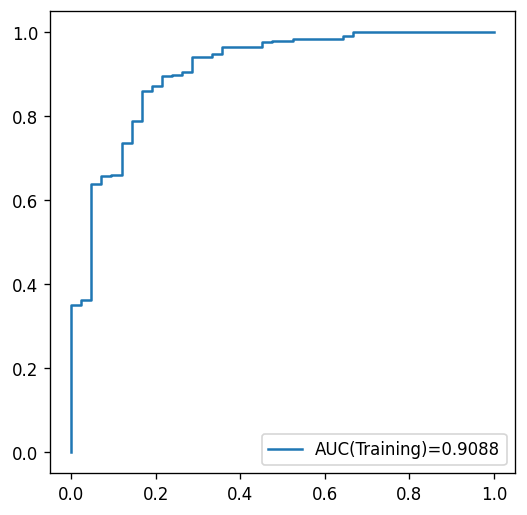

In [13]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(5, 5), dpi=120)

#fit logistic regression model and plot ROC curv
fpr, tpr, _ = metrics.roc_curve(y_train[:,1], pred[:, 1])
auc = round(metrics.roc_auc_score(y_train[:,1], pred[:, 1]), 4)
plt.plot(fpr,tpr,label="AUC(Training)="+str(auc))


plt.legend()

<Figure size 640x480 with 0 Axes>

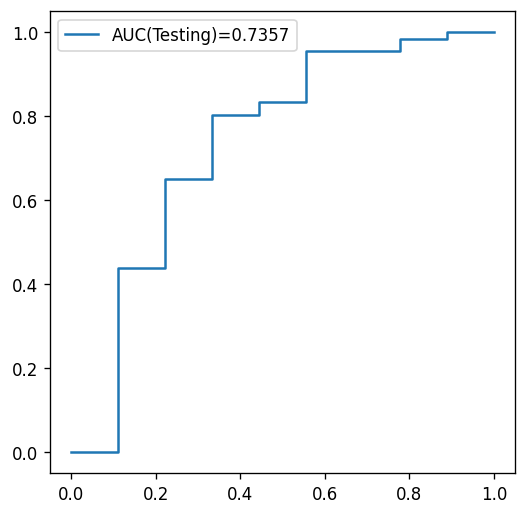

In [14]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(5, 5), dpi=120)

#fit logistic regression model and plot ROC curv
fpr, tpr, _ = metrics.roc_curve(y_test[:,1], pred_y[:, 1])
auc = round(metrics.roc_auc_score(y_test[:,1], pred_y[:, 1]), 4)
plt.plot(fpr,tpr,label="AUC(Testing)="+str(auc))

plt.legend()

# label = gender , data numbers = 404

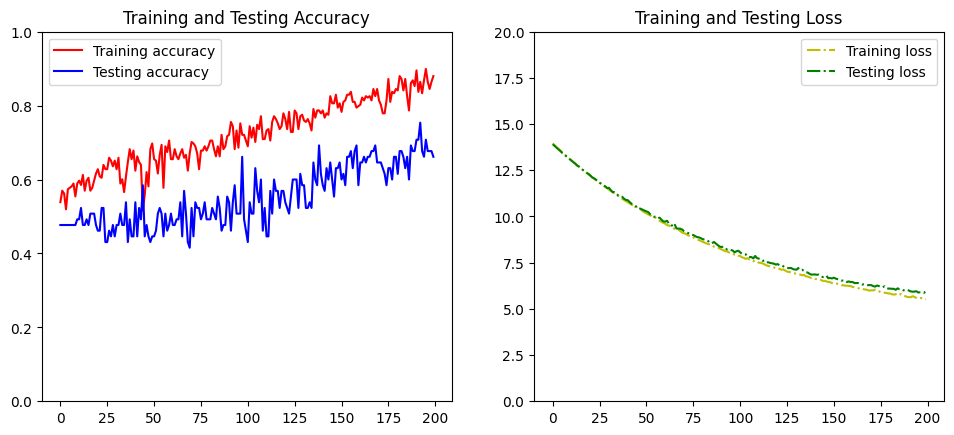

In [26]:
acc = model_history.history['accuracy']
val_auc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']


epochs = range(len(acc))
plt.figure(figsize=(18, 4.8))
plt.subplot(1,3,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_auc, 'b', label='Testing accuracy')
plt.ylim(0, 1)
plt.title('Training and Testing Accuracy')
plt.legend(loc=0)

plt.subplot(1,3,2)
plt.plot(epochs, loss, 'y-.', label='Training loss')
plt.plot(epochs, val_loss, 'g-.', label='Testing loss')
plt.title('Training and Testing Loss')
plt.ylim(0, 20)
plt.legend(loc=0)
plt.show()

In [29]:
X_train = np.array(X_train)
pred = model.predict(X_train)

<Figure size 640x480 with 0 Axes>

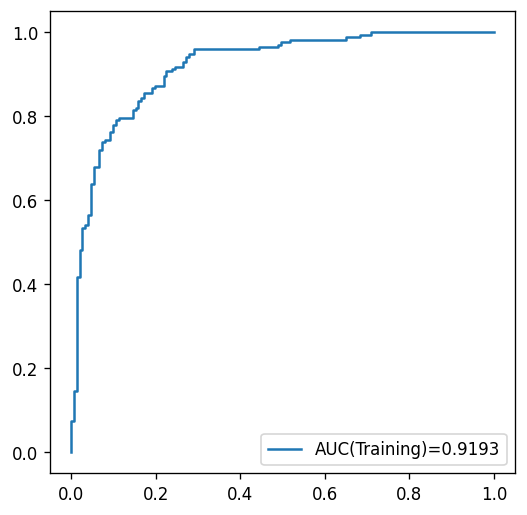

In [30]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(5, 5), dpi=120)

#fit logistic regression model and plot ROC curv
fpr, tpr, _ = metrics.roc_curve(y_train[:,1], pred[:, 1])
auc = round(metrics.roc_auc_score(y_train[:,1], pred[:, 1]), 4)
plt.plot(fpr,tpr,label="AUC(Training)="+str(auc))


plt.legend()

In [31]:
X_test = np.array(X_test)
pred_y = model.predict(X_test)

<Figure size 640x480 with 0 Axes>

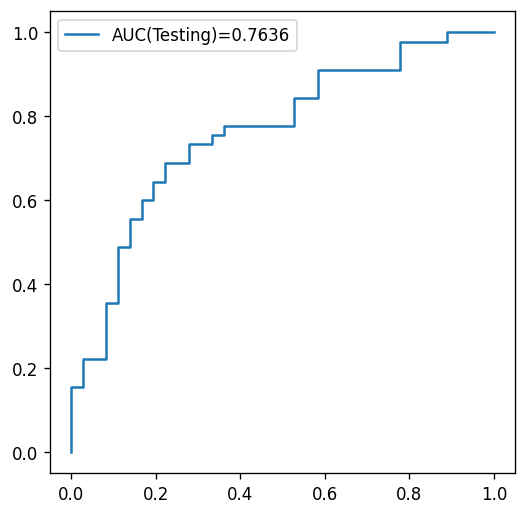

In [32]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(5, 5), dpi=120)

#fit logistic regression model and plot ROC curv
fpr, tpr, _ = metrics.roc_curve(y_test[:,1], pred_y[:, 1])
auc = round(metrics.roc_auc_score(y_test[:,1], pred_y[:, 1]), 4)
plt.plot(fpr,tpr,label="AUC(Testing)="+str(auc))

plt.legend()